### **Analysis of qmio measurements.**

Measurements from 26/03. Specifications:

- ```results2.txt```

Initial state: 1 \
The absolute exectution time was:  1.1553826332092285 \
The theoretical exectution time is (num_rep * rep_period):  1000 * 0.0005 = 0.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qmio_utils import read_data, ErrorAnalyzer
from collections import Counter, defaultdict

In [2]:
bits_array = read_data("data/results2.txt")
print(bits_array[:9])

['01111' '11011' '11110' '11110' '11111' '11110' '11111' '11111' '11111']


In [3]:
# parameters of the data
total_time = 1.1553826332092285
num_measurements = 1000 
repetition_period = 0.0005
init_state = '1'

errors_dict = ErrorAnalyzer(repetition_period = repetition_period, init_state = init_state, measurements = bits_array, verbose=2).get_errors()

The analysis was performed using the *high repetition period* approach 
(repetition_period ≥ 500 μs). The error dictionary contains:

- Key: 'high_period_errors' → Returns two arrays with 1000 measurements:
  - 'error_counts': Array with the number of errors associated with each measurement.
  - 'times': Array with the times of each measurement (calculated as i * repetition_period).


This plot accounts for the number of errors recorded in each iteration.The most typical values are 1 and 2 values (it would be clearer in later graphs). 

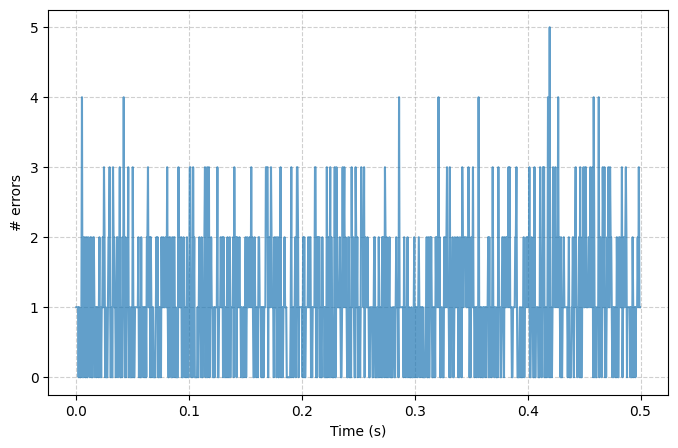

In [4]:
errors = errors_dict['high_period_errors']['error_counts']
times = errors_dict['high_period_errors']['times']


plt.figure(figsize=(8,5))
plt.plot(times, errors, '-', markersize=3, alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("# errors")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


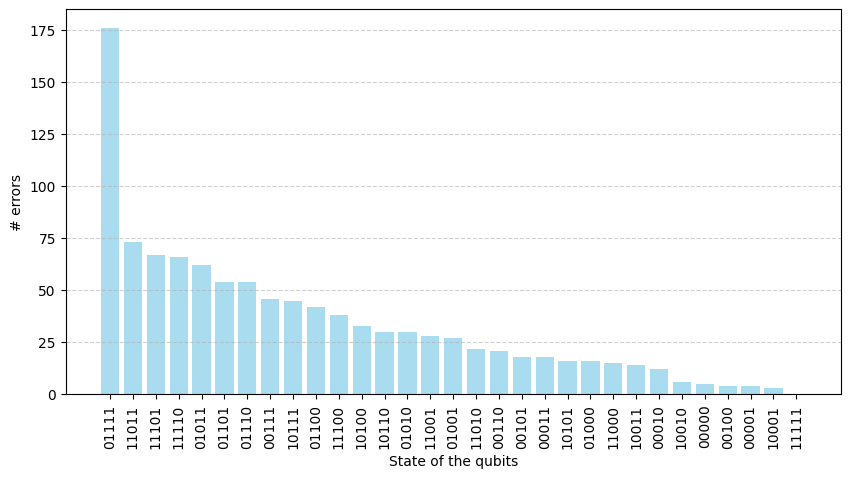

In [5]:
states = errors_dict['high_period_errors']['states']  # measured states
errors = errors_dict['high_period_errors']['error_counts']  # number of errors assigned to each measurement

# defining a dictionary to count the number of errors assigned to each state
state_error_counts = defaultdict(int) 

# assigning each state with the corresponding number of errors
for state, error in zip(states, errors):
    state_error_counts[state] += error

# we order the states according to their total number of errors
states_sorted = sorted(state_error_counts.keys(), key=lambda x: state_error_counts[x], reverse=True)
errors_sorted = [state_error_counts[state] for state in states_sorted]

# graph with the result
plt.figure(figsize=(10,5))
plt.bar(states_sorted, errors_sorted, color='skyblue', alpha=0.7)
plt.xlabel("State of the qubits")
plt.ylabel("# errors")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

This graph would be interesting, since we are seeing that the first qubit is more vulnerable to produce an error, but we don't know which are the qubits used in this measurement so we can't really extract information from there...

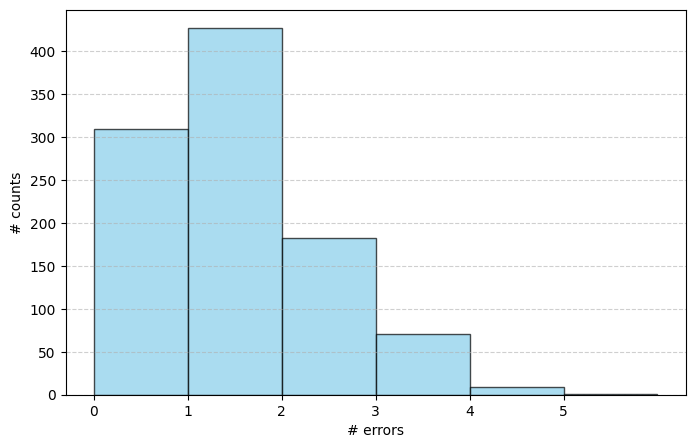

In [6]:
plt.figure(figsize=(8,5))
plt.hist(errors, bins=range(min(errors), max(errors) + 2), color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel("# errors")
plt.ylabel("# counts")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(min(errors), max(errors) + 1))  # Asegurar que los ticks sean enteros
plt.show()

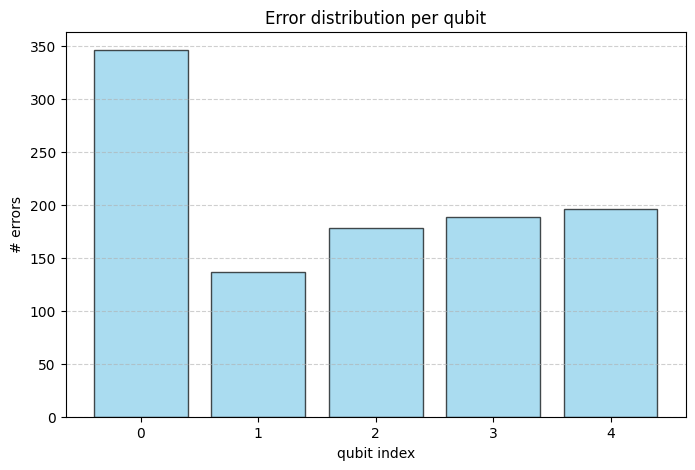

In [9]:
errors_per_qubit = errors_dict["high_period_errors"]["errors_per_qubit"]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(range(len(errors_per_qubit)), errors_per_qubit, color='skyblue', alpha=0.7, edgecolor='black')

# Etiquetas
plt.xlabel("qubit index")
plt.ylabel("# errors")
plt.title("Error distribution per qubit")
plt.xticks(range(len(errors_per_qubit)))  # Marcamos los qubits en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()